# Analysis of Social Media Usage and Emotional Well-Being

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df_train = pd.read_csv('/content/sample_data/train.csv')
df_train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


# Basic Data Checks

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [4]:
df_train['Age'].value_counts()

,count
Age,
28,92
27,92
29,90
22,74
26,66
25,64
24,64
31,62
21,56


In [5]:
wrong_values = ['Male' , 'Female' , 'Non-binary' ,' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']
df_train = df_train[~df_train['Age'].isin(wrong_values)]

In [6]:
df_train['Age'] = df_train['Age'].astype('Int64')

In [7]:
df_train['Age'].value_counts()

,count
Age,
28,92
27,92
29,90
22,74
26,66
25,64
24,64
31,62
33,56


In [8]:
print("The Shape of Train Dataset is",df_train.shape)

The Shape of Train Dataset is (924, 10)


# Exploratory Data Analysis

       Gender  Count
0      Female    344
1        Male    332
2  Non-binary    248


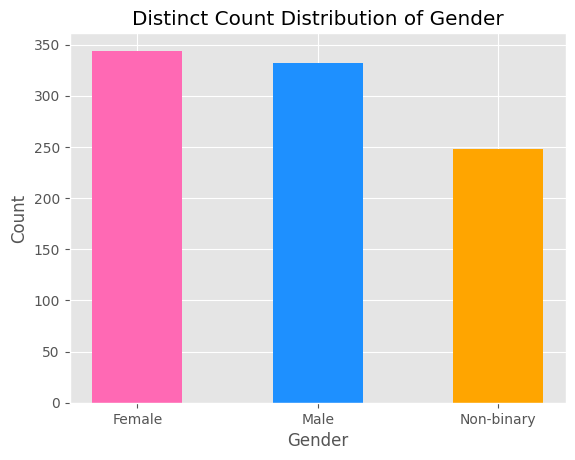

In [9]:
gender_cols = df_train['Gender'].value_counts().reset_index()
gender_cols.columns = ['Gender','Count']
print(gender_cols)
fig , ax = plt.subplots()
ax.bar(gender_cols['Gender'], gender_cols['Count'],color= ['hotpink','dodgerblue','orange'] \
      ,width = 0.5)
ax.set_title("Distinct Count Distribution of Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.show()

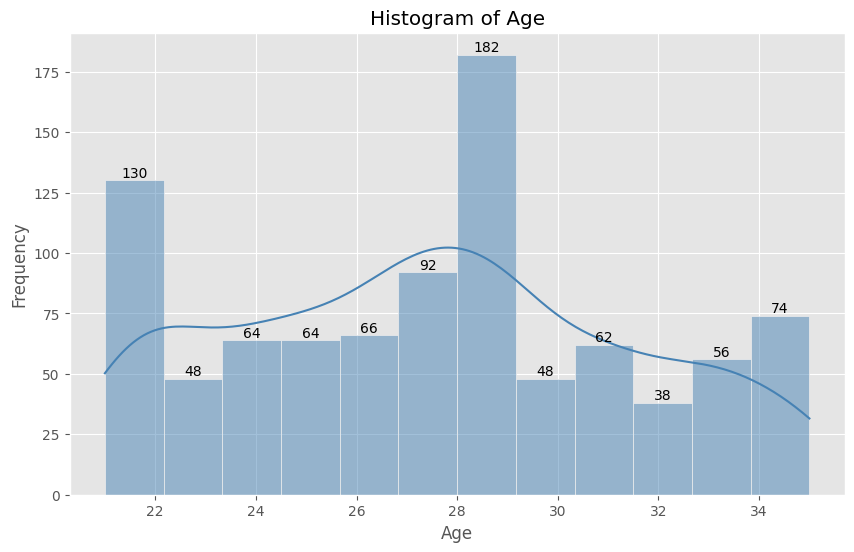

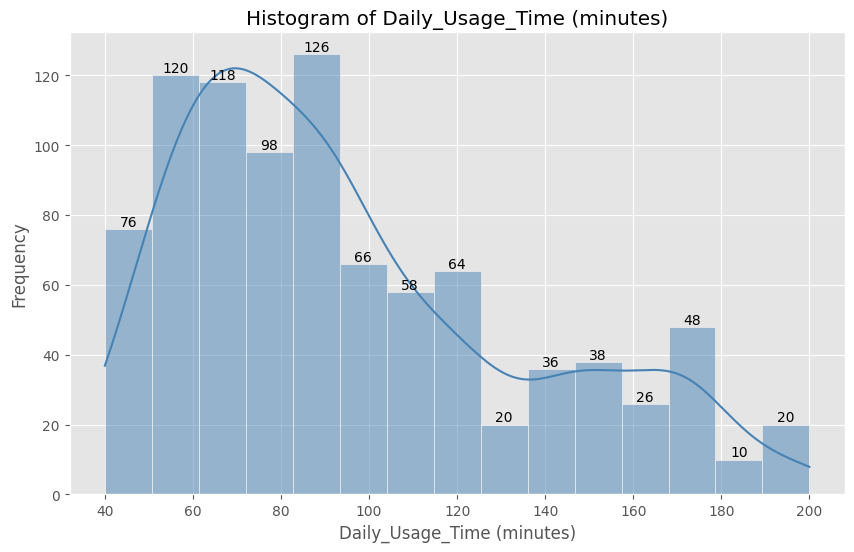

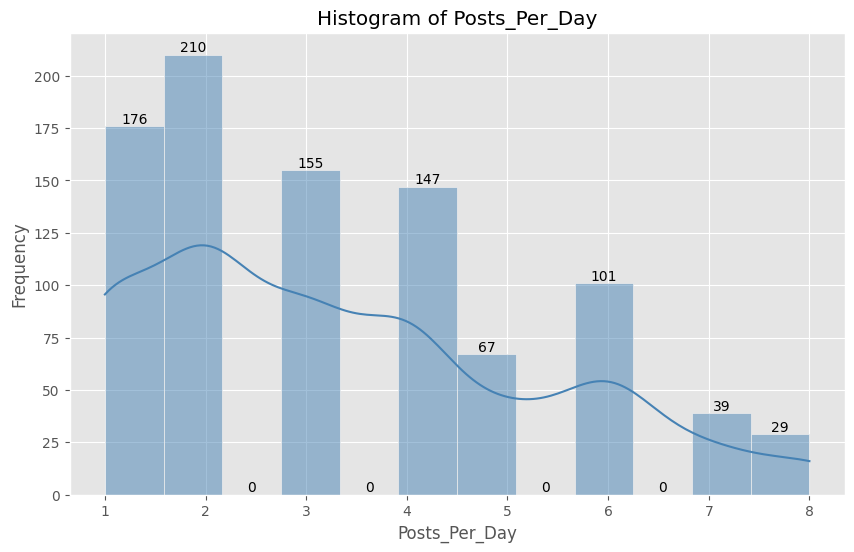

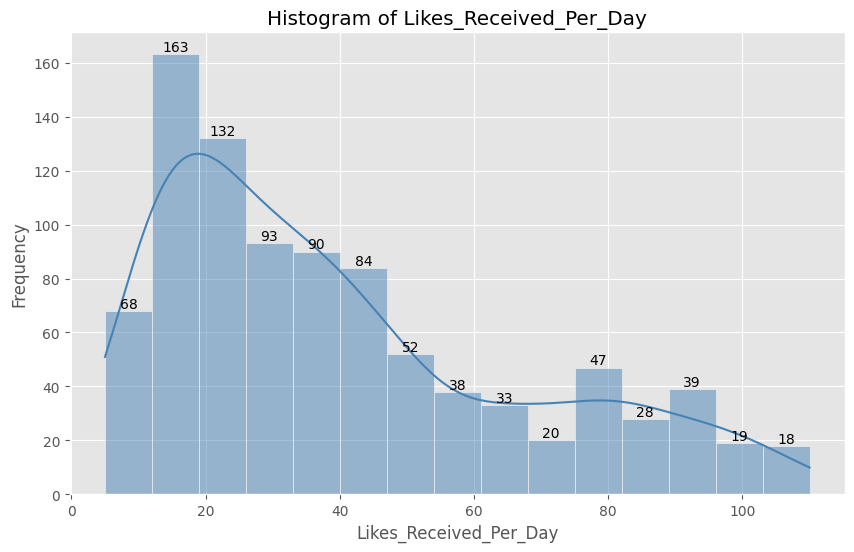

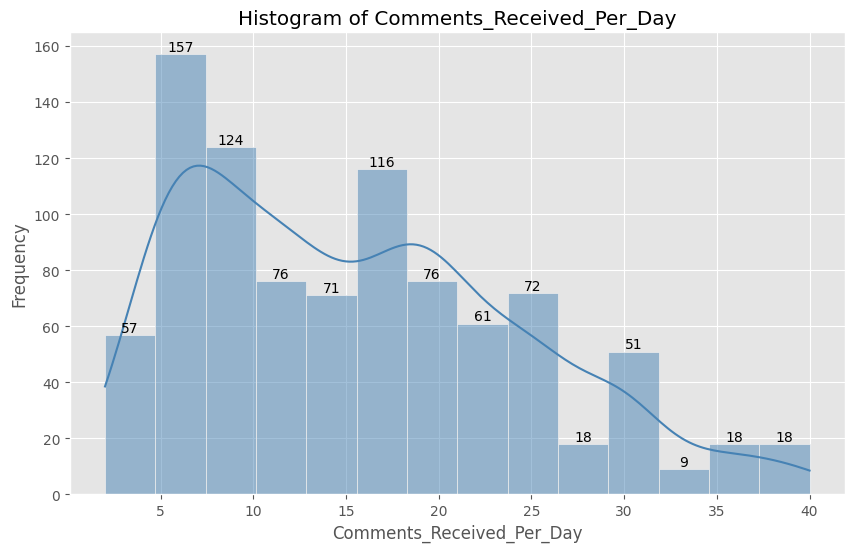

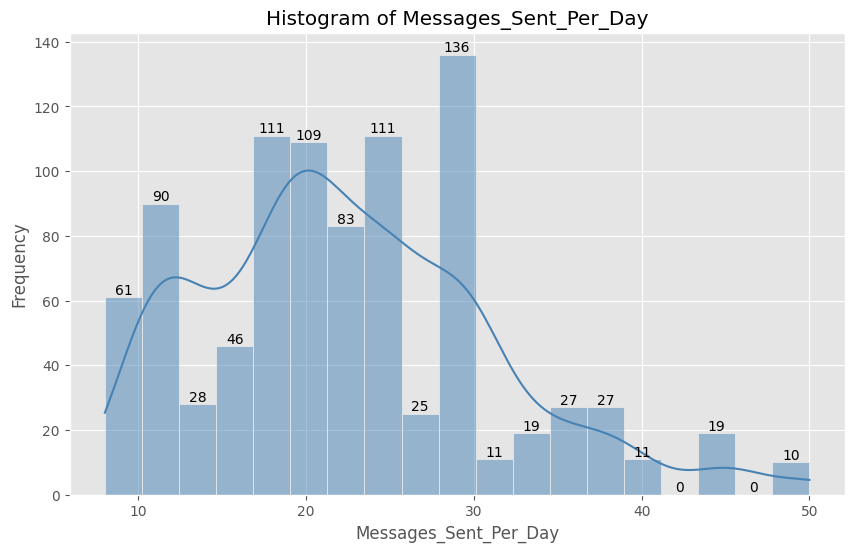

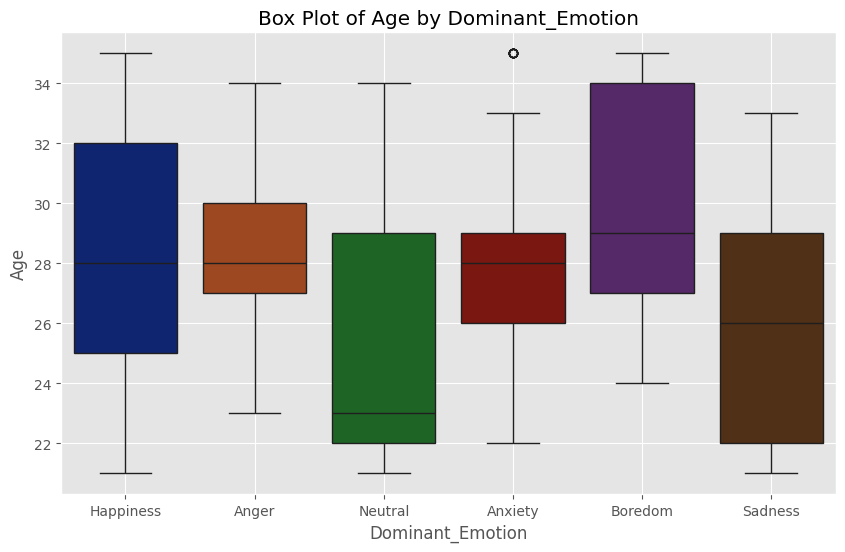

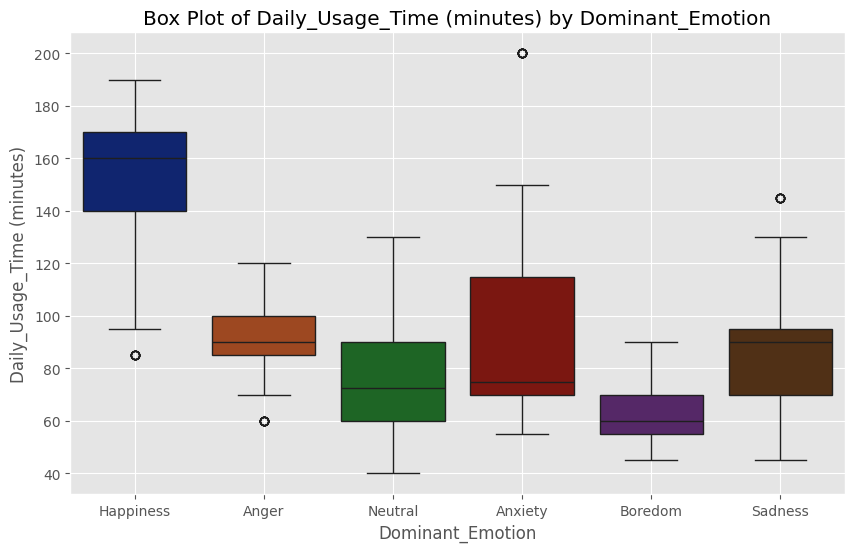

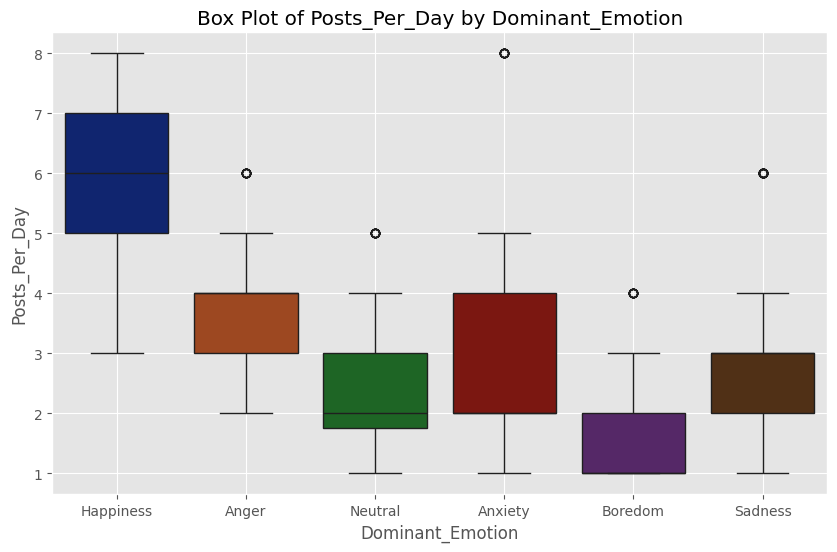

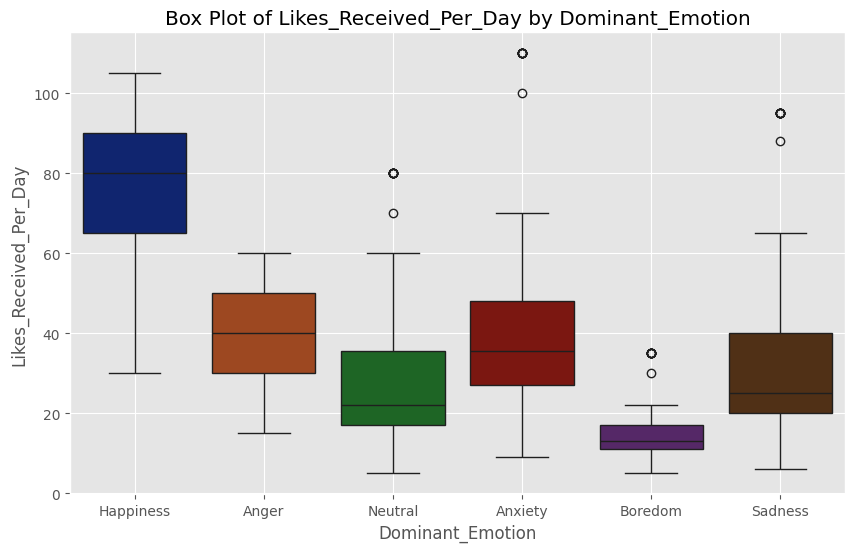

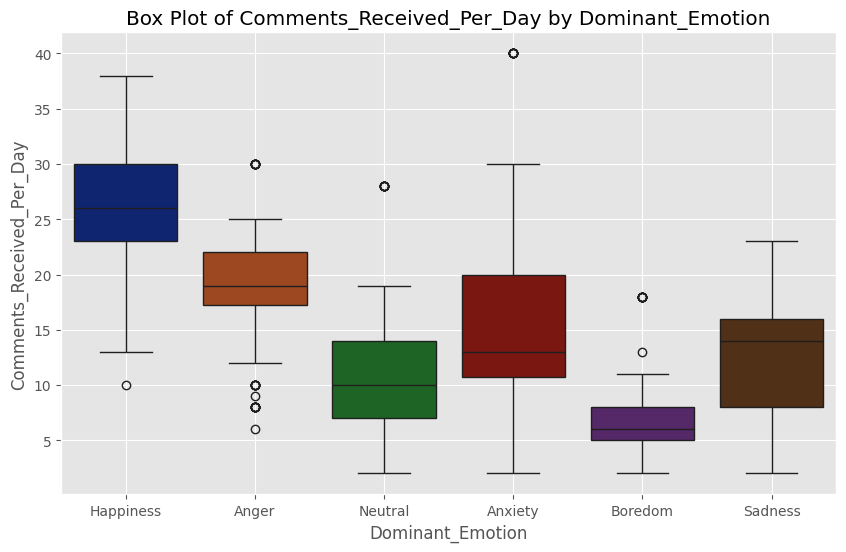

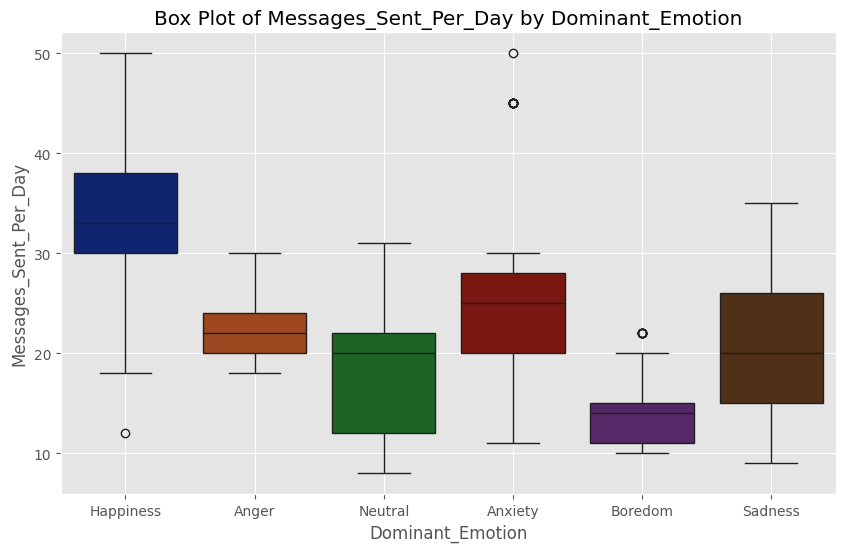

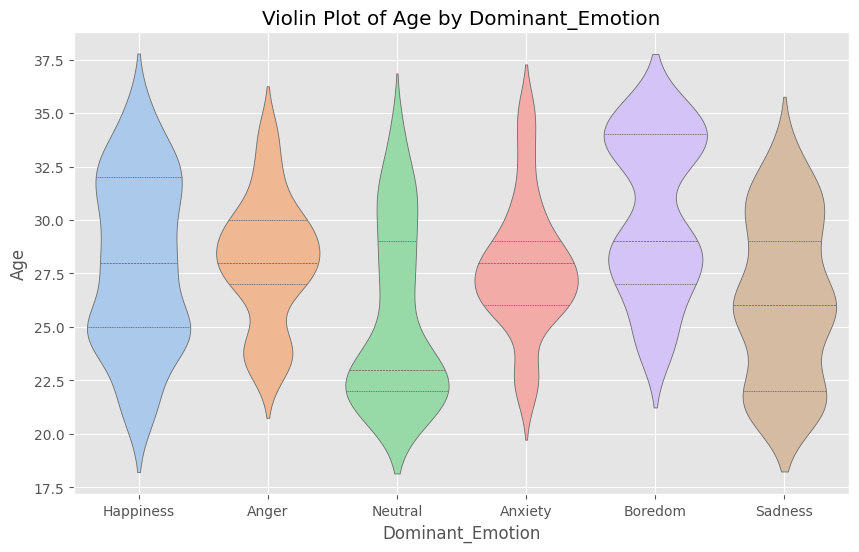

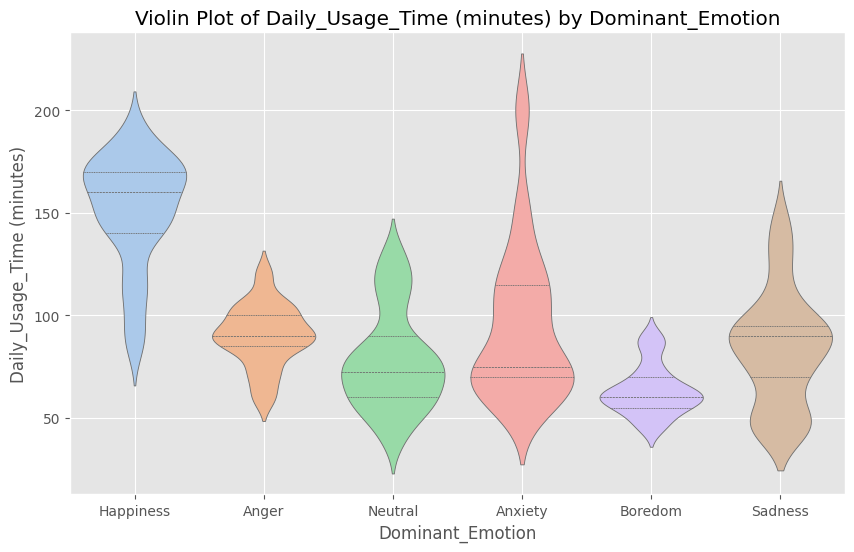

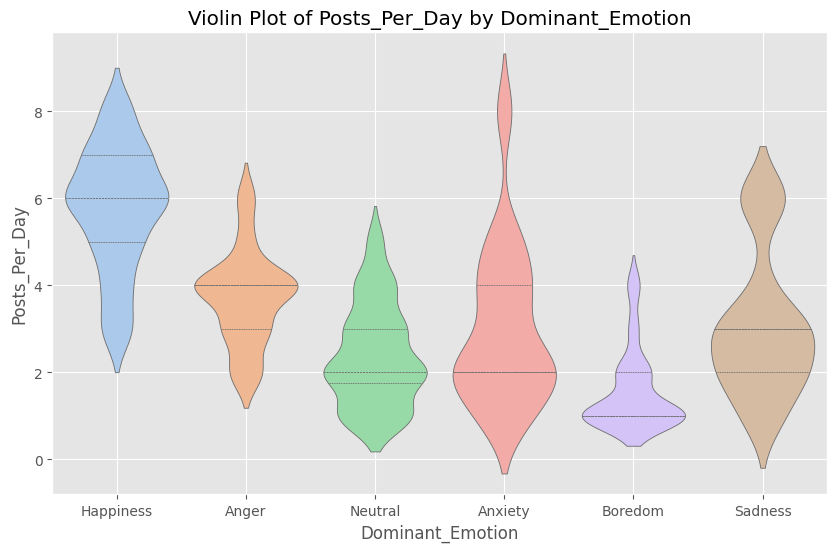

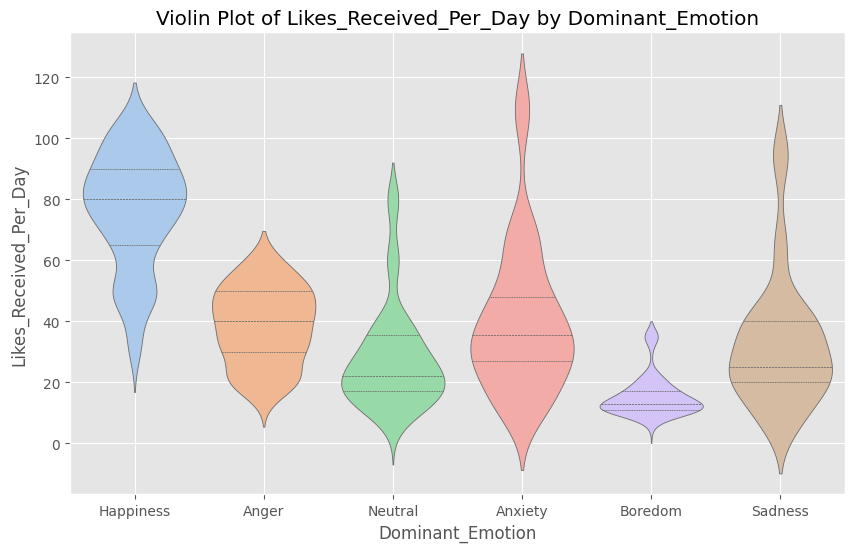

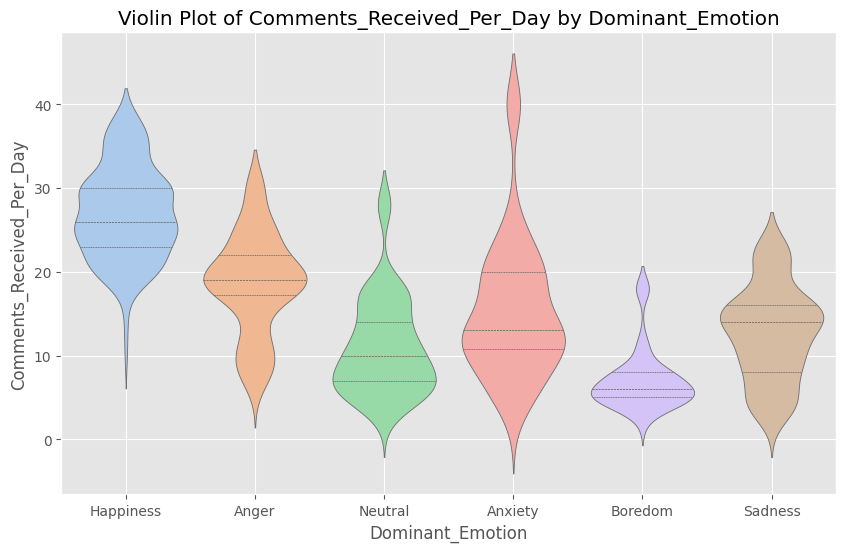

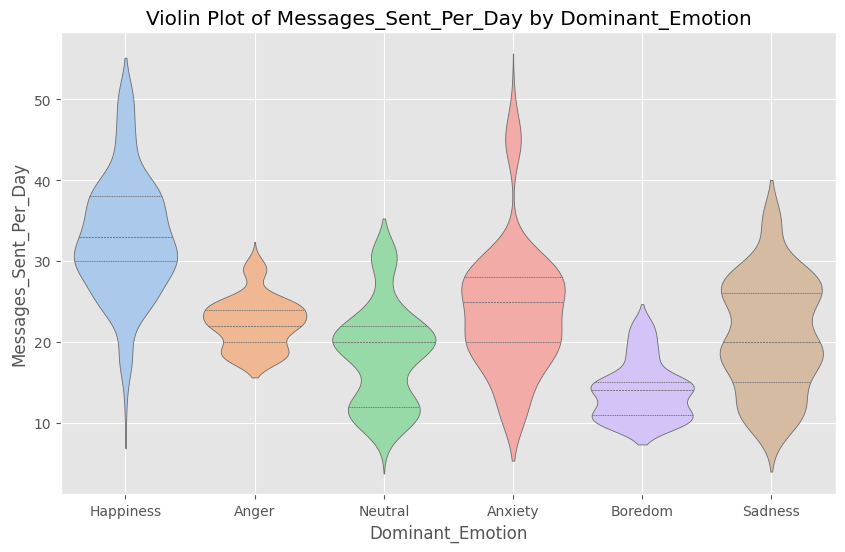

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day' \
                   , 'Comments_Received_Per_Day','Messages_Sent_Per_Day']

# Plotting histograms for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(df_train[var].dropna(), kde=True, color = 'steelblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    plt.show()

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_train, x='Dominant_Emotion', y=var, palette='dark')
    plt.title(f'Box Plot of {var} by Dominant_Emotion')
    plt.xlabel('Dominant_Emotion')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

# Violin plot for continuous variables vs Exited
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df_train, x='Dominant_Emotion', y=var, palette='pastel', inner="quartile")
    plt.title(f'Violin Plot of {var} by Dominant_Emotion')
    plt.xlabel('Dominant_Emotion')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

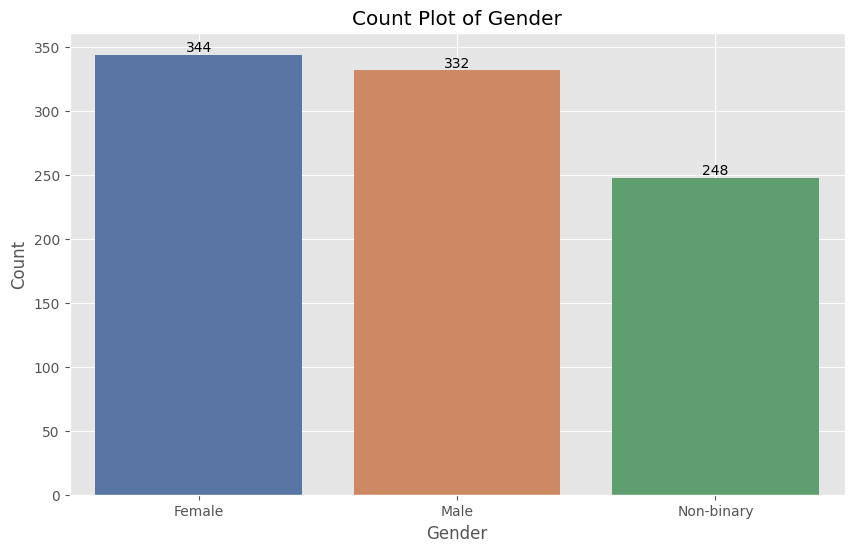

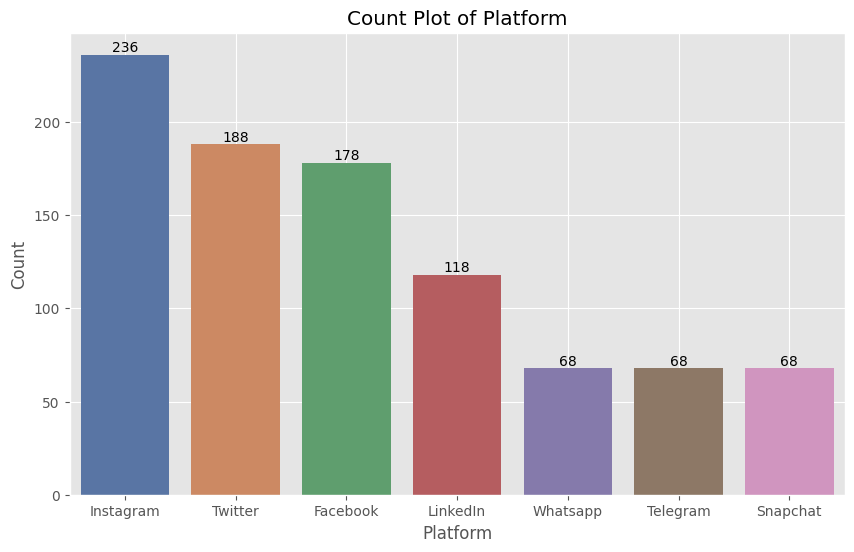

In [11]:
# List of categorical variables
categorical_vars = ['Gender', 'Platform']

# Plotting count plots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df_train, x=var, palette='deep')
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%d')
    plt.show()

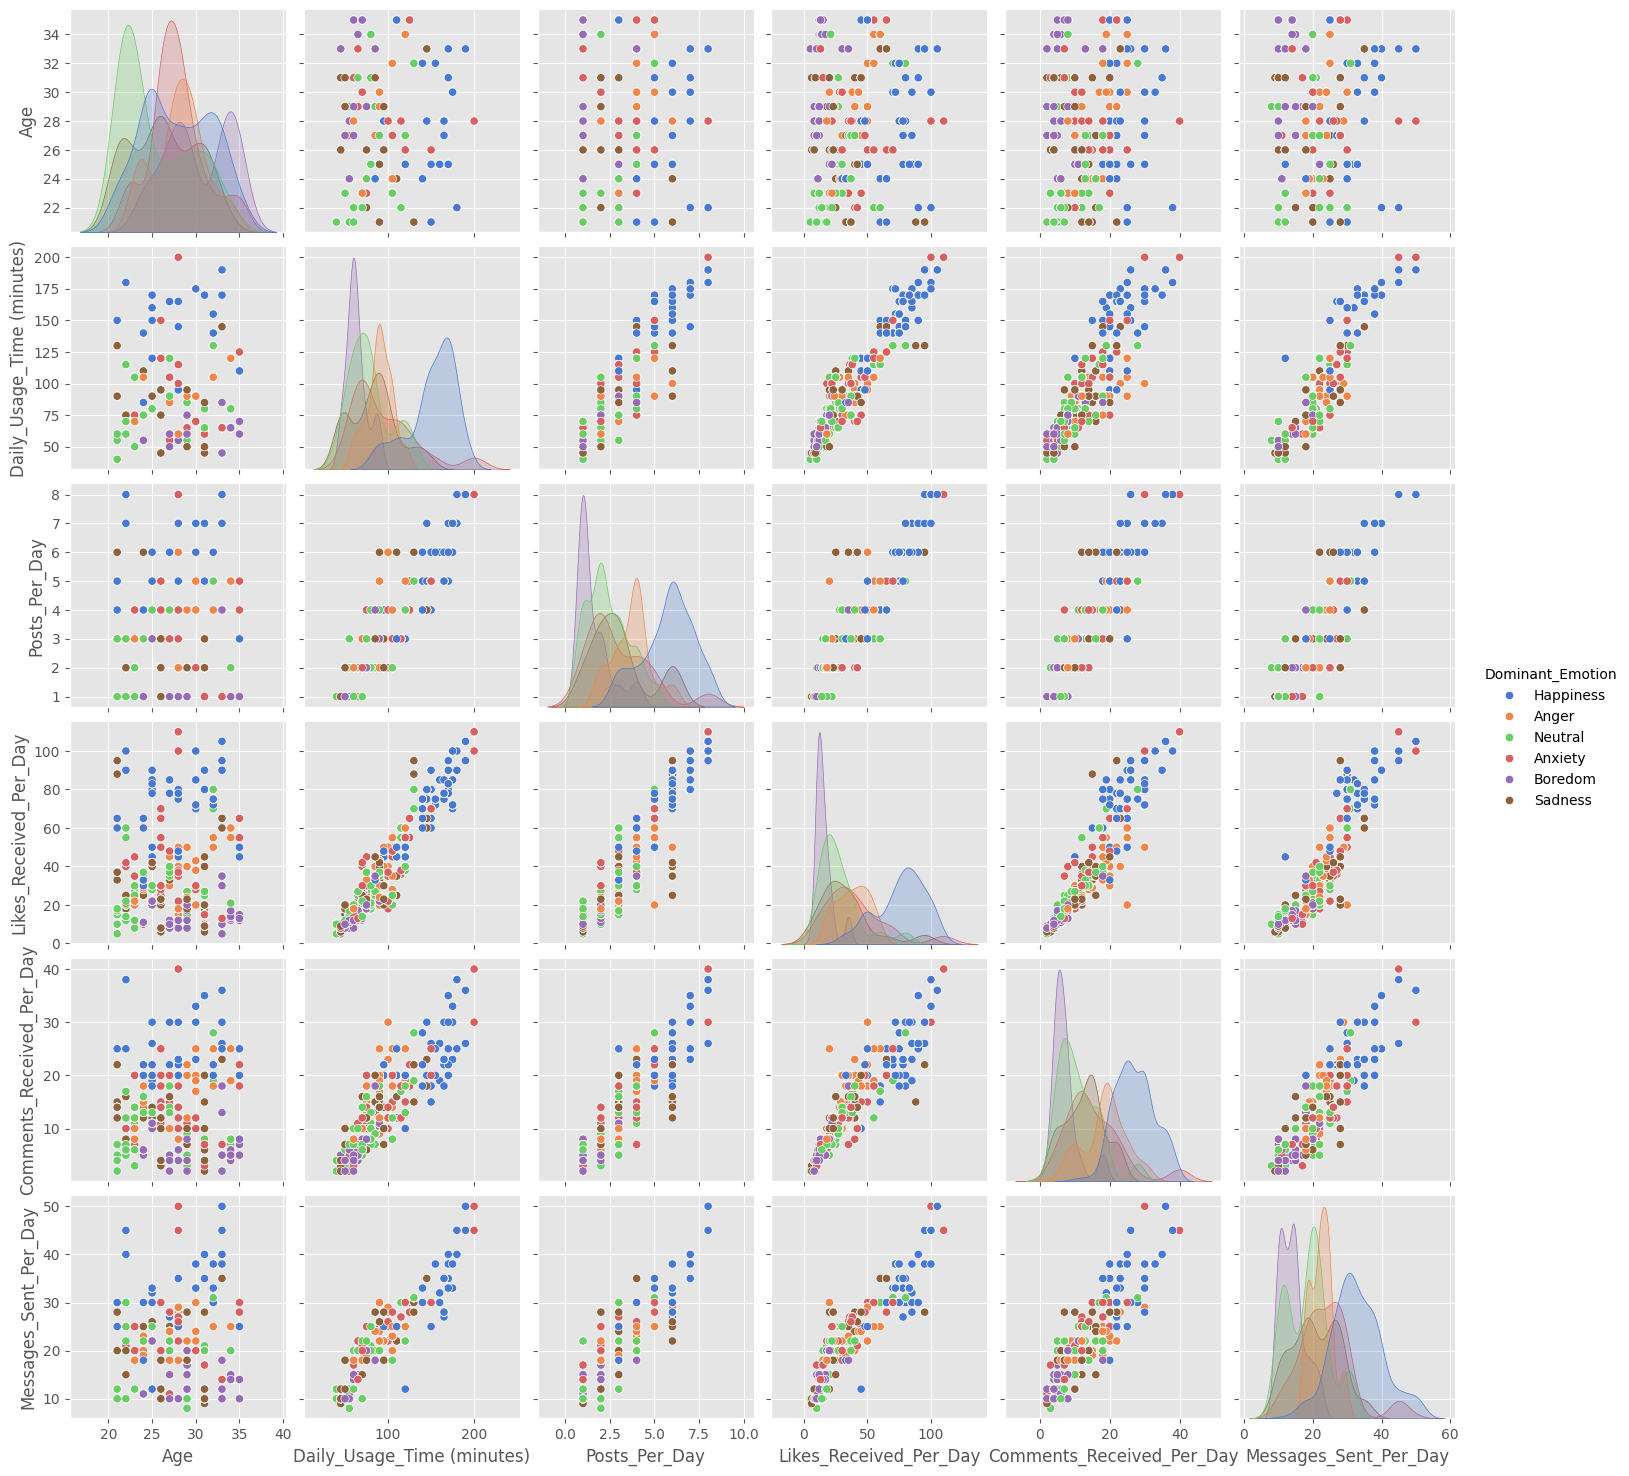

In [12]:
sns.pairplot(df_train[continuous_vars + ['Dominant_Emotion']], hue='Dominant_Emotion', palette='muted', diag_kind='kde')
plt.show()

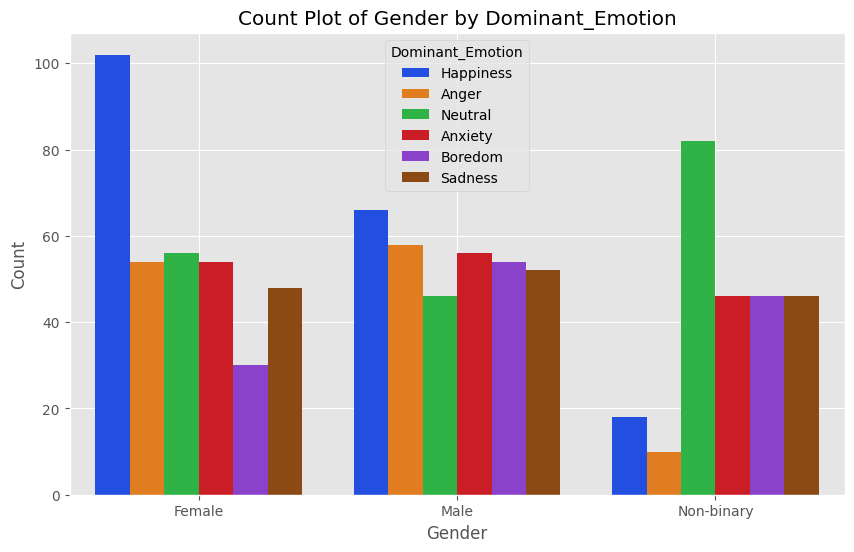

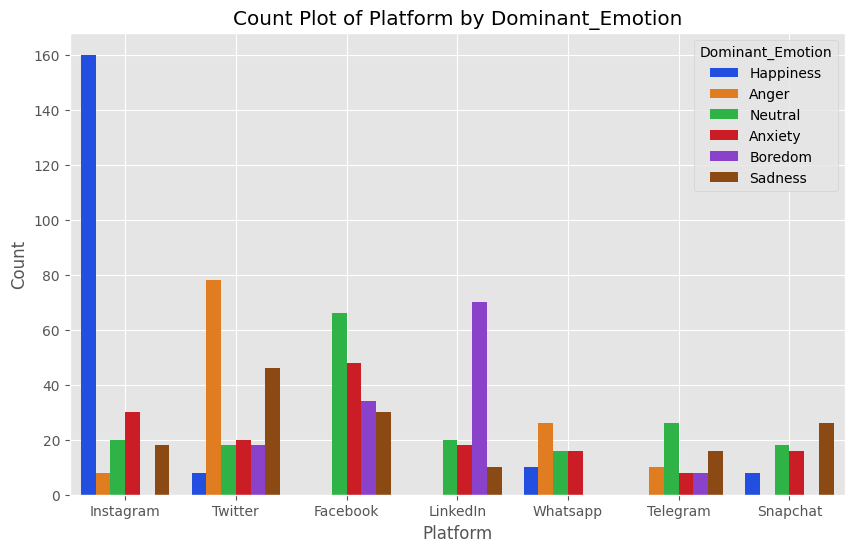

In [13]:
# Plotting count plots for categorical variables vs Exited
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train, x=var, hue='Dominant_Emotion', palette='bright')
    plt.title(f'Count Plot of {var} by Dominant_Emotion')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

<Figure size 1200x800 with 0 Axes>

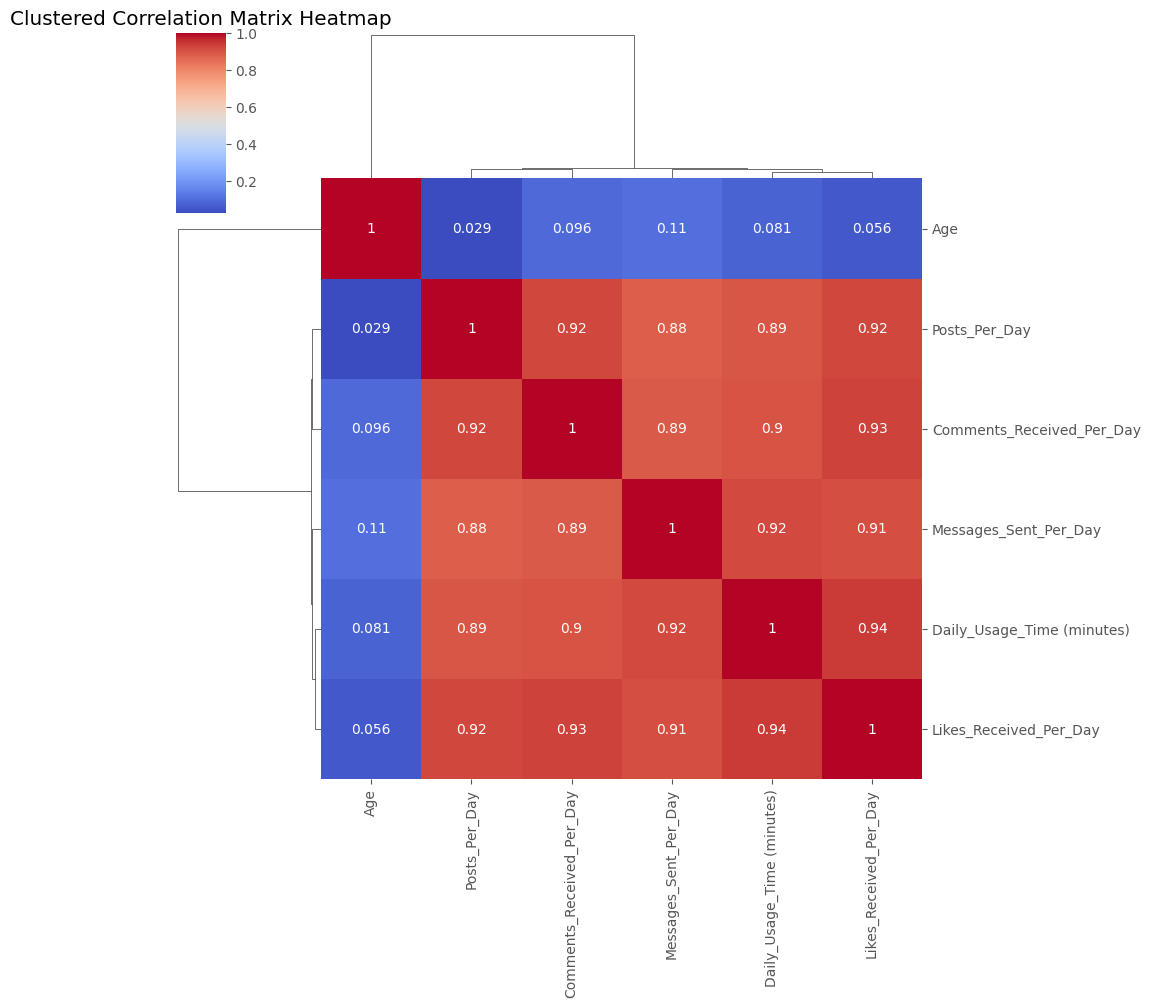

In [14]:
# Heatmap with clustering
plt.figure(figsize=(12, 8))
sns.clustermap(df_train[continuous_vars].corr(), annot=True, cmap='coolwarm', figsize=(10, 10))
plt.title('Clustered Correlation Matrix Heatmap')
plt.show()

In [20]:
train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/test.csv')

In [21]:
# Function to count outliers based on the 99th percentile
def count_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outliers = {}
    for col in numeric_cols:
        upper_limit = df[col].quantile(0.99)
        outliers[col] = (df[col] > upper_limit).sum()
    return outliers

# Count outliers
outliers_count_train = count_outliers(train_df.drop(columns = ['User_ID']))
outliers_count_test = count_outliers(test_df.drop(columns = ['User_ID']))


# Print the count of outliers for each numerical column
print("Outliers count based on the 99th percentile:")
for col, count in outliers_count_train.items():
    print(f"{col}: {count}")

# Print the count of outliers for each numerical column
print("Outliers count based on the 99th percentile:")
for col, count in outliers_count_test.items():
    print(f"{col}: {count}")


# Function to remove outliers based on the 99th percentile
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        upper_limit = df[col].quantile(0.99)
        df = df[df[col] <= upper_limit]
    return df

# Remove outliers
df_cleaned_train = remove_outliers(train_df)
df_cleaned_test = remove_outliers(test_df)


# Check the shape of the cleaned dataset
print("Original dataset shape:", df_train.shape)
print("Cleaned dataset shape:", df_cleaned_train.shape)


train_df = df_cleaned_train
test_df = df_cleaned_test

Outliers count based on the 99th percentile:
Daily_Usage_Time (minutes): 10
Posts_Per_Day: 0
Likes_Received_Per_Day: 9
Comments_Received_Per_Day: 9
Messages_Sent_Per_Day: 10
Outliers count based on the 99th percentile:
Daily_Usage_Time (minutes): 1
Posts_Per_Day: 1
Likes_Received_Per_Day: 2
Comments_Received_Per_Day: 2
Messages_Sent_Per_Day: 2
Original dataset shape: (924, 10)
Cleaned dataset shape: (971, 10)


In [22]:
# Handle incorrect age values
wrong_values = ['Male', 'Female', 'Non-binary', ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']
train_df = train_df[~train_df['Age'].isin(wrong_values)]
train_df['Age'] = train_df['Age'].astype('Int64')

test_df = test_df[~test_df['Age'].isin(wrong_values)]
test_df['Age'] = test_df['Age'].astype('Int64')

In [23]:
# Check for NaN values and handle them
train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)

# Separate features and target in the train dataset
X_train = train_df.drop('Dominant_Emotion', axis=1)
y_train = train_df['Dominant_Emotion']

# Separate features and target in the test dataset
X_test = test_df.drop('Dominant_Emotion', axis=1)
y_test = test_df['Dominant_Emotion']

In [24]:
# One-hot encode categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of test data with training data (in case some categories are missing)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [25]:
# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

Important Features:
                        Feature  Importance
0                           Age    0.113588
1    Daily_Usage_Time (minutes)    0.111893
3        Likes_Received_Per_Day    0.110366
4     Comments_Received_Per_Day    0.105211
5         Messages_Sent_Per_Day    0.100955
2                 Posts_Per_Day    0.069723
906            Platform_Twitter    0.030402
902          Platform_Instagram    0.025527
901           Gender_Non-binary    0.022604
900                 Gender_Male    0.020376


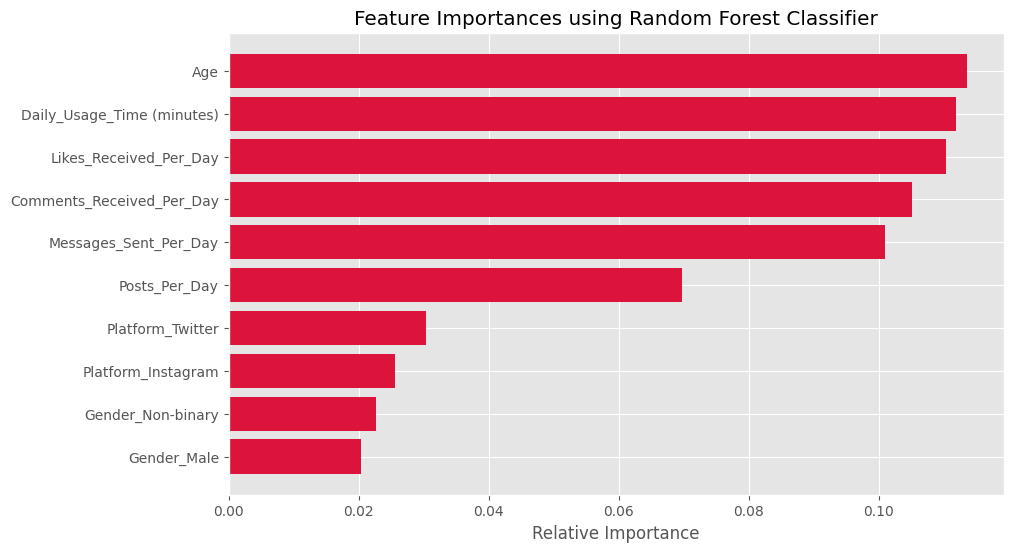

In [26]:
# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
top_10_features = feature_importances['Feature'].head(10).values

# Print the top 10 features
print("Important Features:")
print(feature_importances.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances using Random Forest Classifier")
plt.barh(feature_importances.head(10)['Feature'], feature_importances.head(10)['Importance'], color='crimson', align='center')
plt.gca().invert_yaxis()
plt.xlabel('Relative Importance')
plt.show()

In [27]:
# Reduce the data to top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Apply scaling again to the reduced feature set
X_train_top10_scaled = scaler.fit_transform(X_train_top10)
X_test_top10_scaled = scaler.transform(X_test_top10)

# Retrain the RandomForestClassifier with top 10 features
rf_classifier_top10 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_top10.fit(X_train_top10_scaled, y_train)

# Make predictions
y_pred_top10 = rf_classifier_top10.predict(X_test_top10_scaled)

In [28]:
# Evaluate the model
accuracy_top10 = accuracy_score(y_test, y_pred_top10)
print(f"\nAccuracy with Top 10 Features: {accuracy_top10:.2f}")
print("Classification Report with Top 10 Features:")
print(classification_report(y_test, y_pred_top10))
print("Confusion Matrix with Top 10 Features:")
print(confusion_matrix(y_test, y_pred_top10))


Accuracy with Top 10 Features: 0.95
Classification Report with Top 10 Features:
              precision    recall  f1-score   support

       Anger       0.90      1.00      0.95         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       1.00      0.88      0.93        16
   Happiness       0.86      1.00      0.92        12
     Neutral       0.96      1.00      0.98        26
     Sadness       0.92      0.86      0.89        14

    accuracy                           0.95        98
   macro avg       0.94      0.95      0.94        98
weighted avg       0.95      0.95      0.95        98

Confusion Matrix with Top 10 Features:
[[ 9  0  0  0  0  0]
 [ 0 20  0  1  0  0]
 [ 0  0 14  0  1  1]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 26  0]
 [ 1  0  0  1  0 12]]


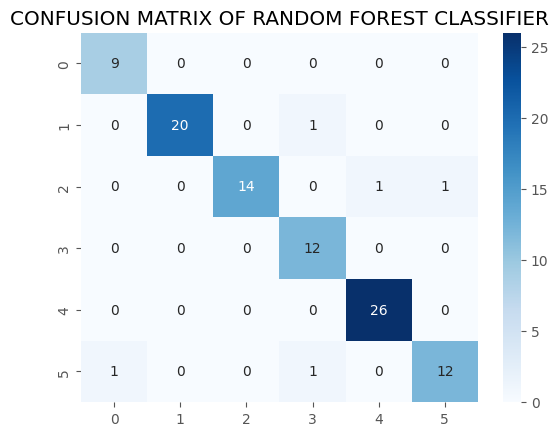

In [33]:
#Confusion Matrix for Random Forest Classifier
cm= confusion_matrix(y_test, y_pred_top10)
sns.heatmap(data=cm, annot= True, cmap='Blues')
plt.title('CONFUSION MATRIX OF RANDOM FOREST CLASSIFIER')
plt.show()

# Using Gradient Boosting Machines (GBM) - XGBoost

Accuracy of XGBoost Classifier: 0.96

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       0.94      0.94      0.94        16
   Happiness       0.86      1.00      0.92        12
     Neutral       1.00      1.00      1.00        26
     Sadness       0.92      0.86      0.89        14

    accuracy                           0.96        98
   macro avg       0.95      0.96      0.95        98
weighted avg       0.96      0.96      0.96        98



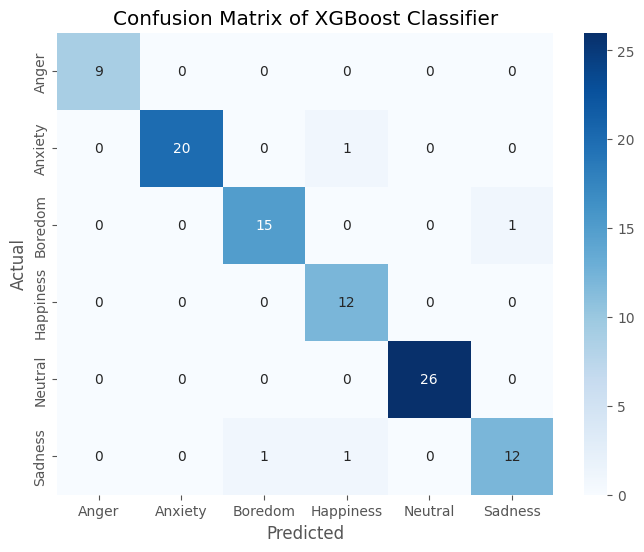

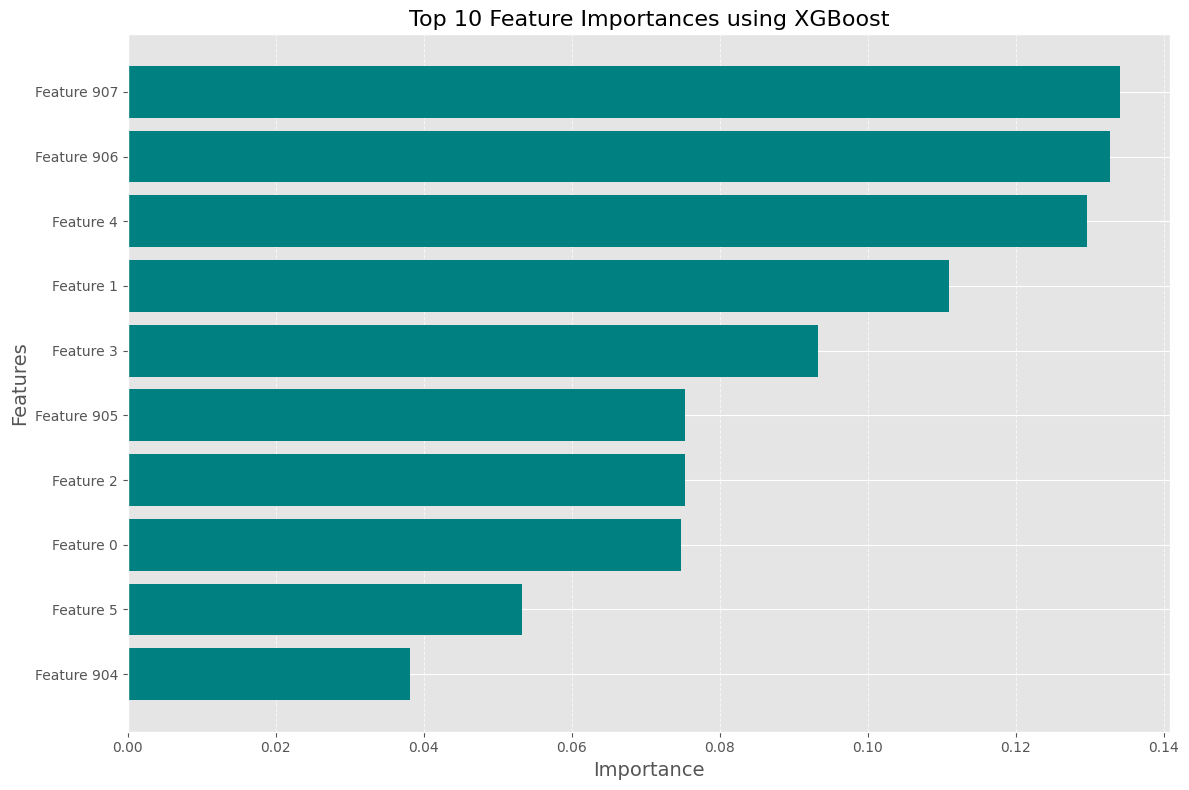

In [34]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported for DataFrame handling

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts to integers
y_test_encoded = label_encoder.transform(y_test)        # Use the same mapping for test data

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False
)

# Train the model on the training data
xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Decode predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb:.2f}")

print("\nClassification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred_labels))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_labels, labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix of XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Extract feature importances from the trained XGBoost model
feature_importances_xgb = xgb_classifier.feature_importances_

# Ensure X_train is a DataFrame; otherwise, supply feature names manually
if isinstance(X_train_scaled, pd.DataFrame):
    feature_names = X_train_scaled.columns
else:
    # If X_train_scaled is a NumPy array, define feature names explicitly
    feature_names = [f'Feature {i}' for i in range(X_train_scaled.shape[1])]

# Sort features by importance
sorted_idx = feature_importances_xgb.argsort()
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances_xgb[sorted_idx]

# Plot the sorted feature importances
plt.figure(figsize=(12, 8))
plt.barh(sorted_features[-10:], sorted_importances[-10:], color='teal')  # Show top 10 features
plt.title('Top 10 Feature Importances using XGBoost', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

# Using SMOTE

Class Distribution Before SMOTE: 4    184
3    167
5    146
1    146
2    130
0    122
Name: count, dtype: int64
Class Distribution After SMOTE: 3    184
0    184
4    184
2    184
5    184
1    184
Name: count, dtype: int64

Random Forest (Without SMOTE)
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       Anger       0.90      1.00      0.95         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       0.94      0.94      0.94        16
   Happiness       1.00      1.00      1.00        12
     Neutral       1.00      0.96      0.98        26
     Sadness       0.93      1.00      0.97        14

    accuracy                           0.97        98
   macro avg       0.96      0.98      0.97        98
weighted avg       0.97      0.97      0.97        98



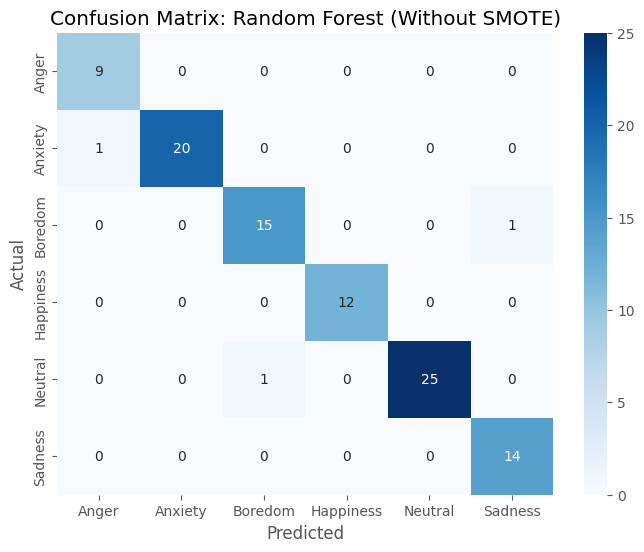


XGBoost (Without SMOTE)
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       0.94      0.94      0.94        16
   Happiness       0.86      1.00      0.92        12
     Neutral       1.00      1.00      1.00        26
     Sadness       0.92      0.86      0.89        14

    accuracy                           0.96        98
   macro avg       0.95      0.96      0.95        98
weighted avg       0.96      0.96      0.96        98



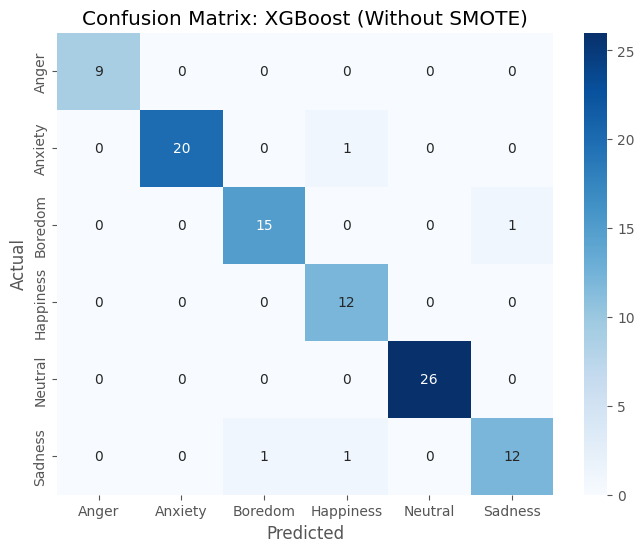


Random Forest (With SMOTE)
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       Anger       0.90      1.00      0.95         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       0.94      0.94      0.94        16
   Happiness       1.00      1.00      1.00        12
     Neutral       1.00      0.96      0.98        26
     Sadness       0.93      1.00      0.97        14

    accuracy                           0.97        98
   macro avg       0.96      0.98      0.97        98
weighted avg       0.97      0.97      0.97        98



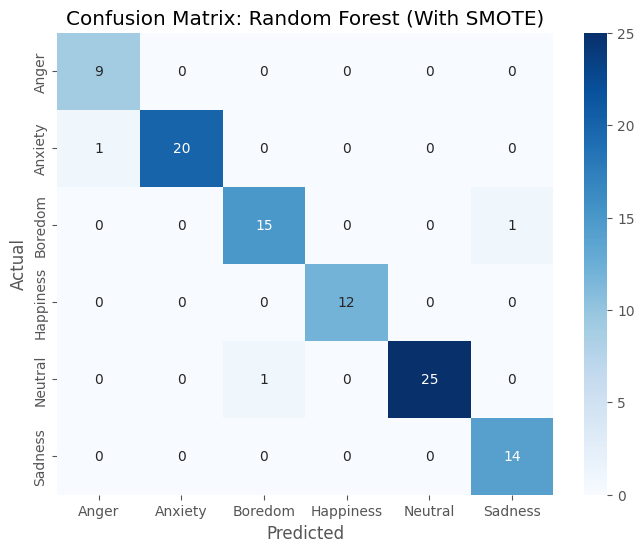


XGBoost (With SMOTE)
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       1.00      0.94      0.97        16
   Happiness       0.92      1.00      0.96        12
     Neutral       0.96      1.00      0.98        26
     Sadness       0.93      0.93      0.93        14

    accuracy                           0.97        98
   macro avg       0.97      0.97      0.97        98
weighted avg       0.97      0.97      0.97        98



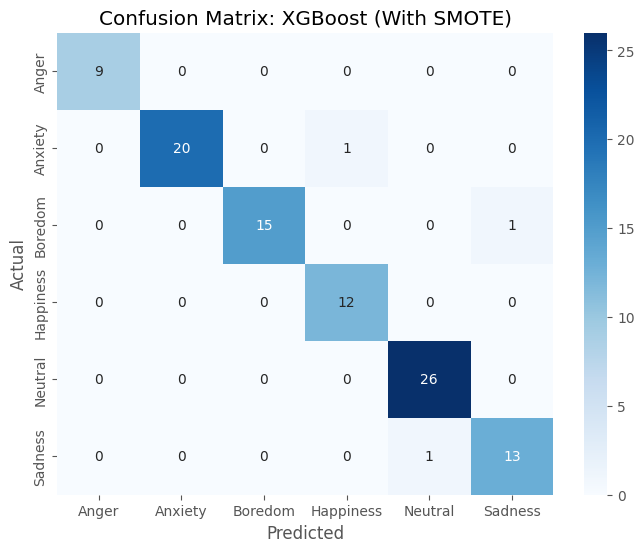


Comparison of Model Accuracies:
                   Model  Accuracy
0          Random Forest  0.969388
1  Random Forest (SMOTE)  0.969388
2                XGBoost  0.959184
3        XGBoost (SMOTE)  0.969388


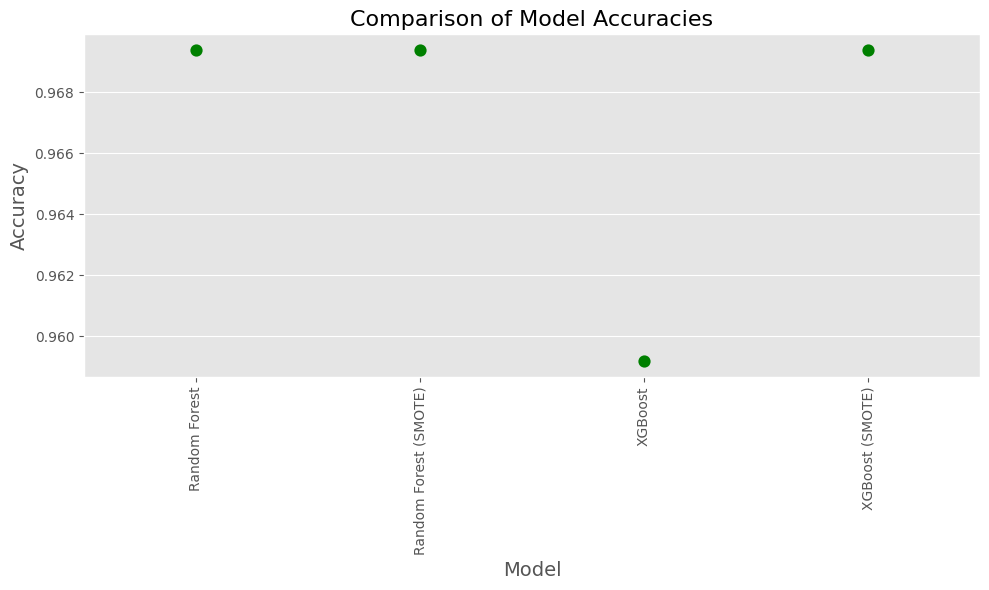

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Data Preprocessing (assuming X_train, X_test, y_train, y_test are already defined and scaled)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_encoded)

# Print the new class distribution after SMOTE
print("Class Distribution Before SMOTE:", pd.Series(y_train_encoded).value_counts())
print("Class Distribution After SMOTE:", pd.Series(y_train_smote).value_counts())

# Step 2: Train and Evaluate Models Before and After SMOTE

# Initialize models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False)

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, title):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Decode predictions (if necessary)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_test_labels = label_encoder.inverse_transform(y_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    print(f"\n{title}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test_labels, y_pred_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy

# Train and evaluate models (without SMOTE)
rf_accuracy_no_smote = train_and_evaluate(random_forest, X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded, "Random Forest (Without SMOTE)")
xgb_accuracy_no_smote = train_and_evaluate(xgb_classifier, X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded, "XGBoost (Without SMOTE)")

# Train and evaluate models (with SMOTE)
rf_accuracy_with_smote = train_and_evaluate(random_forest, X_train_smote, y_train_smote, X_test_scaled, y_test_encoded, "Random Forest (With SMOTE)")
xgb_accuracy_with_smote = train_and_evaluate(xgb_classifier, X_train_smote, y_train_smote, X_test_scaled, y_test_encoded, "XGBoost (With SMOTE)")

# Step 3: Compare Results
results = pd.DataFrame({
    "Model": ["Random Forest", "Random Forest (SMOTE)", "XGBoost", "XGBoost (SMOTE)"],
    "Accuracy": [rf_accuracy_no_smote, rf_accuracy_with_smote, xgb_accuracy_no_smote, xgb_accuracy_with_smote]
})

print("\nComparison of Model Accuracies:")
print(results)

# Plot comparison
plt.figure(figsize=(10, 6))
sns.pointplot(x="Model", y="Accuracy", data=results, join=False, color="g")
plt.title("Comparison of Model Accuracies", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()